In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class KMeansClustering:
  def __init__(self,k = 3):
    self.k = k
    self.centroids = None


  @staticmethod
  def euclidian_distance(data_point,centroids):
    return np.sqrt(np.sum((centroids-data_point)**2,axis = 1)) #Distancia euclidiana para N dimensoes


  def fit(self,X,max_iterations = 200):
    self.centroids = np.random.uniform(np.amin(X,axis = 0),np.amax(X,axis = 0),size = (self.k,X.shape[1]))   #Forma inteligente de randomizar a posiçao de cada centroid

    for _ in range(max_iterations):
      y = []

      for data_point in X:
        distances = KMeansClustering.euclidian_distance(data_point,self.centroids)
        cluster_num = np.argmin(distances)            #pega o cluster com a menor distancia até data_point
        y.append(cluster_num)

      y = np.array(y)

      cluster_indices = []           #lista de lista em que guarda todos os pontos de cada cluster
      for i in range(self.k):
        cluster_indices.append(np.argwhere(y == i))



      cluster_centers = []

      for j,indices in enumerate(cluster_indices):
        if len(indices) == 0:
          cluster_centers.append(self.centroids[j])
        else:
          cluster_centers.append(np.mean(X[indices],axis = 0)[0])


      if np.max(self.centroids - np.array(cluster_centers)) < 0.0001: #se a mudança for pequena,logo convergiu
        break                                                         #Para
      else:
        self.centroids = np.array(cluster_centers)                    #atualiza os centroids
    return y



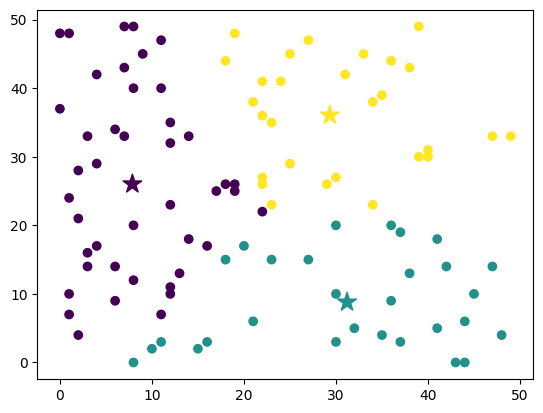

In [ ]:
random_points = np.random.randint(0,50,(100,2))
kmeans = KMeansClustering(k = 3)
model = kmeans.fit(random_points)


plt.scatter(random_points[:,0],random_points[:,1],c = model)
plt.scatter(kmeans.centroids[:,0],kmeans.centroids[:,1], c = range(len(kmeans.centroids)),marker = "*",s = 200)
plt.show()
